In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import urllib.request,urllib.parse
import os
import time
import datetime
%matplotlib notebook

In [2]:
d = json.load(open('./test_data.json', encoding = 'utf-8'))

In [3]:
userId = '49823'

In [4]:
len(d)

271

In [5]:
d.keys()

dict_keys(['3544', '48117', '49405', '51584', '60581', '60587', '60604', '60606', '60616', '60619', '60631', '60634', '60635', '60639', '60654', '60665', '60671', '60676', '60686', '60707', '60708', '60715', '60737', '60752', '60760', '60762', '60763', '60769', '60772', '60773', '60775', '60782', '60785', '60788', '60799', '60812', '60829', '60832', '60833', '60870', '60885', '60895', '60896', '60899', '61019', '61053', '61094', '61406', '60615', '47329', '60598', '58834', '59018', '60586', '60589', '60602', '60603', '60613', '60620', '60621', '60627', '60632', '60636', '60642', '60651', '60652', '60658', '60659', '60677', '60683', '60688', '60690', '60694', '60695', '60703', '60706', '60714', '60716', '60720', '60722', '60724', '60725', '60730', '60733', '60738', '60742', '60753', '60756', '60759', '60764', '60768', '60771', '60787', '60790', '60827', '60828', '60900', '60901', '61097', '61106', '61132', '61135', '61519', '40552', '61035', '61074', '60583', '39201', '48102', '58758', 

In [6]:
def ymd(x):
    time_local = time.localtime(int(x)//1000)
    dt = time.strftime("%Y-%m-%d",time_local)
    return dt

In [7]:
def h(x):
    time_local = time.localtime(int(x)//1000)
    dt = time.strftime("%H:00",time_local)
    return dt

In [8]:
def f(x):
    time_local = time.localtime(int(x)//1000)
    dt = time.strftime("%Y-%m-%d %H:%M:%S",time_local)
    return dt

In [9]:
def maxt(x):
    return x.max()

In [10]:
def mint(x):
    return x.min()

In [11]:
def dtime(x):
    time_begin = time.localtime(x.min()//1000)
    time_end = time.localtime(x.max()//1000)
    tb = time.strftime("%Y%m%d%H%M%S",time_begin)
    te = time.strftime("%Y%m%d%H%M%S",time_end)
    t_begin = datetime.datetime(int(tb[0:4]),int(tb[4:6]),int(tb[6:8]),int(tb[8:10]),int(tb[10:12]),int(tb[12:14]))
    t_end = datetime.datetime(int(te[0:4]),int(te[4:6]),int(te[6:8]),int(te[8:10]),int(te[10:12]),int(te[12:14]))
    duringtime = t_end - t_begin
    seconds = duringtime.seconds
    return seconds

In [12]:
d[userId]['cases'][0].keys()

dict_keys(['case_id', 'case_type', 'case_zip', 'final_score', 'upload_records'])

In [13]:
cases_keys = ['case_id', 'case_type', 'final_score']

In [14]:
cases = pd.DataFrame(d[userId]['cases'], columns=cases_keys)

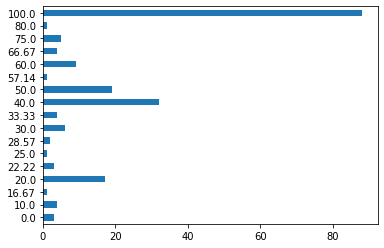

In [15]:
cases.sort_values(by='final_score', ascending=False).drop_duplicates(['case_id'])['final_score'].value_counts().sort_index().plot.barh()

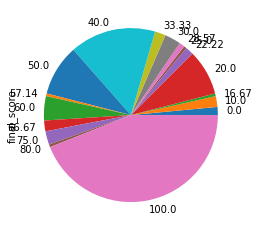

In [45]:
cases.sort_values(by='final_score', ascending=False).drop_duplicates(['case_id'])['final_score'].value_counts().sort_index().plot.pie()

In [16]:
cases

,case_id,case_type,final_score
0,2473,线性表,40.0
1,2691,线性表,50.0
2,2471,线性表,80.0
3,2690,线性表,100.0
4,2590,线性表,75.0
...,...,...,...
195,2705,查找算法,100.0
196,2737,查找算法,100.0
197,2726,查找算法,100.0
198,2715,查找算法,100.0


In [17]:
rcds_keys = ['upload_id', 'upload_time', 'score']

In [18]:
records = d[userId]['cases']
rcds = pd.DataFrame(columns=['upload_id', 'upload_time', 'score', 'c'])
i = 0
for record in records:
    rcd = pd.DataFrame(record['upload_records'], columns=rcds_keys)
    rcd.index = rcd['upload_id']
    rcd['c'] = range(len(rcd))
    rcds = pd.concat([rcds, rcd])
    i = i + 1
print(i)

200


In [19]:
rcds

,upload_id,upload_time,score,c
300001,300001,1584969912936,20.0,0
321717,321717,1585669803822,0.0,1
321718,321718,1585669807908,0.0,2
321719,321719,1585669811397,20.0,3
321720,321720,1585669820197,20.0,4
...,...,...,...,...
262756,262756,1582975227237,0.0,4
262758,262758,1582975260132,0.0,5
262759,262759,1582975268865,50.0,6
278415,278415,1583843920017,50.0,7


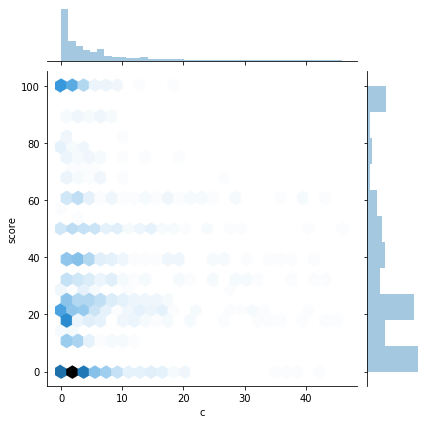

In [44]:
sns.jointplot('c', 'score', data=rcds, kind="hex")

In [20]:
rcds['time_ymd'] = rcds['upload_time'].map(ymd)

In [21]:
rcds['time_h'] = rcds['upload_time'].map(h)

In [22]:
rcds

,upload_id,upload_time,score,c,time_ymd,time_h
300001,300001,1584969912936,20.0,0,2020-03-23,21:00
321717,321717,1585669803822,0.0,1,2020-03-31,23:00
321718,321718,1585669807908,0.0,2,2020-03-31,23:00
321719,321719,1585669811397,20.0,3,2020-03-31,23:00
321720,321720,1585669820197,20.0,4,2020-03-31,23:00
...,...,...,...,...,...,...
262756,262756,1582975227237,0.0,4,2020-02-29,19:00
262758,262758,1582975260132,0.0,5,2020-02-29,19:00
262759,262759,1582975268865,50.0,6,2020-02-29,19:00
278415,278415,1583843920017,50.0,7,2020-03-10,20:00


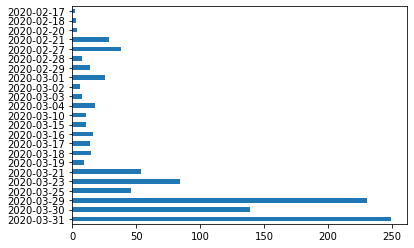

In [23]:
rcds['time_ymd'].value_counts().sort_index(ascending=False).plot.barh()

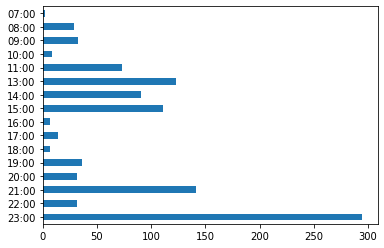

In [24]:
rcds['time_h'].value_counts().sort_index(ascending=False).plot.barh()

In [25]:
trecords = d[userId]['cases']
trcds = pd.DataFrame()
i = 0
for trecord in trecords:
    trcd = pd.DataFrame(trecord['upload_records'], columns=['upload_time'])
    case_id = trecord['case_id']
    #trcd.rename(columns={'upload_records': record['case_id']})
    #print(trcd['upload_time'])
    trcds[case_id] = [trcd['upload_time'].min(), trcd['upload_time'].max()]
    i = i + 1
print(i)

200


In [26]:
trcds

,2473,2691,2471,2690,2590,2724,2723,2646,2722,2721,...,2706,2717,2606,2639,2716,2705,2737,2726,2715,2703
0,1584969912936,1583205928910,1584581534680,1584970250090,1584801907922,1584582112772,1584582492201,1584801943436,1584970892692,1584970599243,...,1584492604467,1584493146347,1582967307020,1583845407470,1584255819918,1584492362028,1582242770302,1582967653068,1583844926582,1582257159347
1,1585669823502,1585669867428,1584581534680,1584970498433,1585668913598,1584582112772,1584582492201,1585668963868,1585669501031,1584970741856,...,1584801735121,1584493206537,1582967351009,1584492197217,1585667914892,1584492362028,1582242770302,1582975194802,1583844926582,1583844165717


In [27]:
#trcds = trcds.applymap(f)

In [28]:
trcds

,2473,2691,2471,2690,2590,2724,2723,2646,2722,2721,...,2706,2717,2606,2639,2716,2705,2737,2726,2715,2703
0,1584969912936,1583205928910,1584581534680,1584970250090,1584801907922,1584582112772,1584582492201,1584801943436,1584970892692,1584970599243,...,1584492604467,1584493146347,1582967307020,1583845407470,1584255819918,1584492362028,1582242770302,1582967653068,1583844926582,1582257159347
1,1585669823502,1585669867428,1584581534680,1584970498433,1585668913598,1584582112772,1584582492201,1585668963868,1585669501031,1584970741856,...,1584801735121,1584493206537,1582967351009,1584492197217,1585667914892,1584492362028,1582242770302,1582975194802,1583844926582,1583844165717


In [29]:
during_seconds = trcds.apply(dtime)

In [30]:
during_seconds

2473     8711
2691    44739
2471        0
2690      248
2590     3006
        ...  
2705        0
2737        0
2726     7541
2715        0
2703    31806
Length: 200, dtype: int64

In [31]:
during_s = np.array(during_seconds)

In [32]:
during_s

array([ 8711, 44739,     0,   248,  3006,     0,     0,  3020,  7409,
         142,  7874,  3158,  7854,  7862,  7567,  7664,    51,   113,
        7833,  7754,  3022,  7685,     0, 58065,  8536,   250,  8572,
          58,  3100,  8596,  1486, 50839,    15,  1236,  1043, 31647,
          29,   832,  1258,    70,    39,     0,    22,    57,   845,
         743,    80,   768, 61576, 61090, 42843, 61417, 61395,    18,
        6338,     0,     0, 61420, 61471,    49,     0, 33888,    83,
          96,     5,     0,    55,    29,    25,     0,   113,    20,
          40,     4,    18,     0,     0,     0,   457,     0,     0,
          44,     0,    12,    15,     0,    12,     0,    10,     9,
           0,    18,    10,     0,    13,    23,   578,    10,  2024,
         132,    36,     0,     0,     0,    19,  1592,  1629, 69023,
         599,     0,     0,   922,     0,  1298,     0,   237, 62885,
       61836, 61270,  5845, 63119, 61285, 62811, 63094, 62780, 61812,
       49423, 61873,

In [33]:
during_s.mean()

15181.09

In [34]:
during_s.std()

24553.69077047074

In [35]:
during_s.var()

602883730.4519001

In [36]:
bins = [0, 600, 1800, 3600, 10800, 21600, 43200, 86400, 259200, 3801600]

In [39]:
group_names = ['10m', '30m', '1h', '3h', '6h', '12h', '1d', '3d','>3d']

In [40]:
cats = pd.cut(during_s, bins, right=False, labels=group_names)

In [41]:
cats

[3h, 1d, 10m, 10m, 1h, ..., 10m, 10m, 3h, 10m, 12h]
Length: 200
Categories (9, object):  < 30m < 1h < 3h ... 12h < 1d < 3d < >3d]

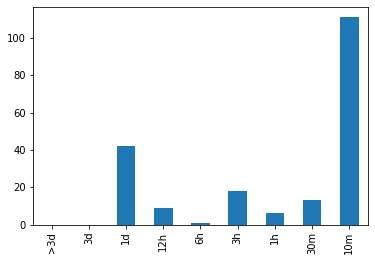

In [42]:
cats.value_counts().sort_index(ascending=False).plot.bar()

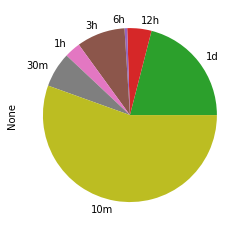

In [43]:
cats.value_counts().sort_index(ascending=False).plot.pie()